In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [30]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)
high_lumi = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_250_500.h5')

print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


0         58.540714
1        109.261432
2         80.398065
3         90.085535
4        119.889999
            ...    
40339     79.321004
40340     44.635757
40341     55.302586
40342     72.333900
40343    116.189770
Name: mass, Length: 40344, dtype: float64

Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

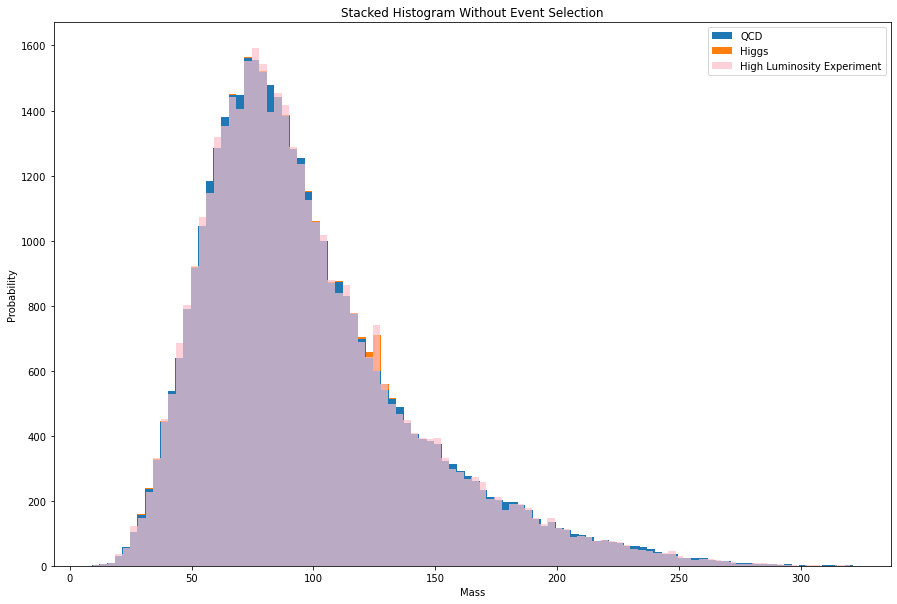

In [72]:
n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

a = ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = False, stacked = True, weights = [qcd_weight, higgs_weight])
ax.hist(high_lumi['mass'], bins = 100, density = False, alpha = .7, color = "pink")

ax.legend(["QCD", "Higgs", "High Luminosity Experiment"])
ax.set_title("Stacked Histogram Without Event Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

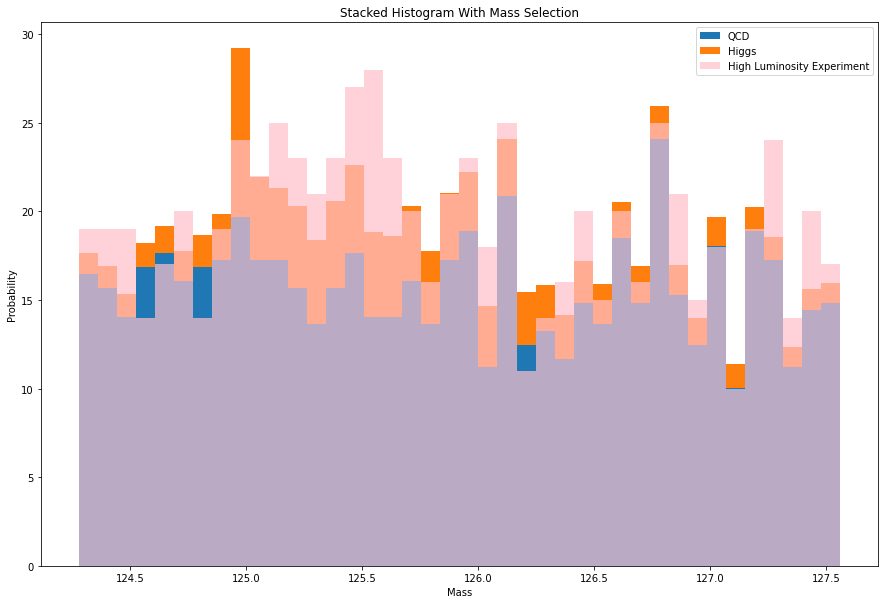

In [74]:
n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

a = ax.hist([qcd['mass'], higgs['mass']], bins = 40, density = False, stacked = True, weights = [qcd_weight, higgs_weight], range = [124.28, 127.56])
ax.hist(high_lumi['mass'], bins = 40, density = False, alpha = .7, color = "pink", range = [124.28, 127.56])

ax.legend(["QCD", "Higgs", "High Luminosity Experiment"])
ax.set_title("Stacked Histogram With Mass Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

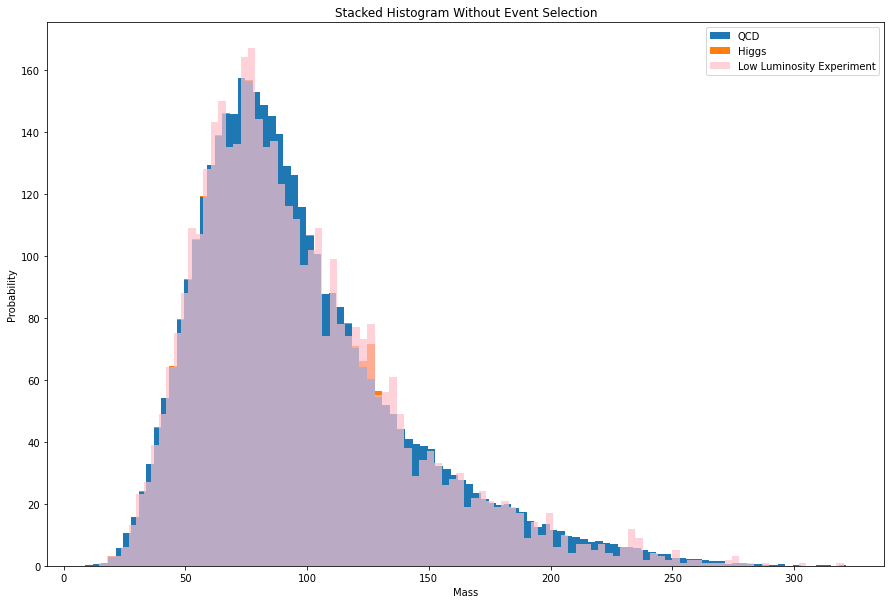

In [65]:
n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = False, stacked = True, weights = [qcd_weight, higgs_weight])
ax.hist(low_lumi['mass'], bins = 100, density = False, alpha = .7, color = 'pink')

ax.legend(["QCD", "Higgs", "Low Luminosity Experiment"])
ax.set_title("Stacked Histogram Without Event Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

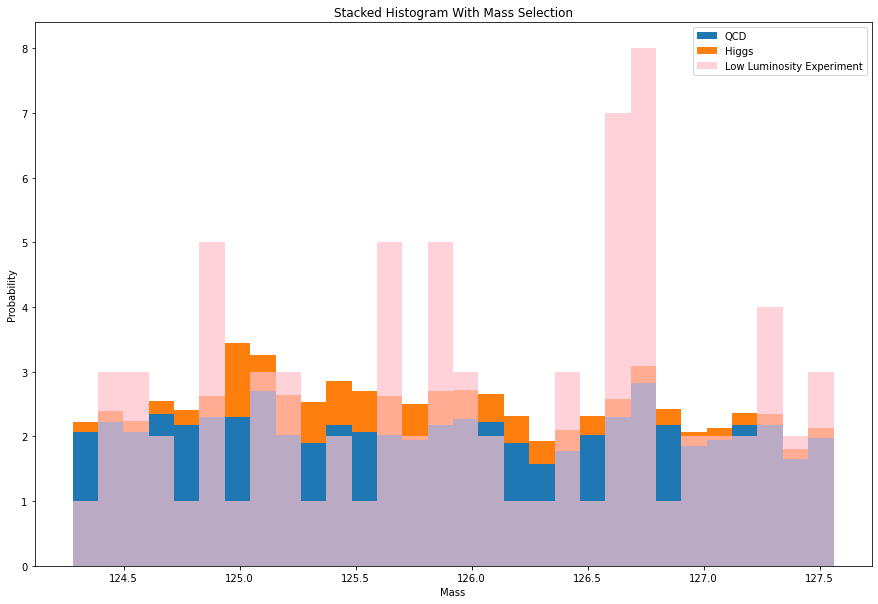

In [71]:
n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 30, density = False, stacked = True, weights = [qcd_weight, higgs_weight], range = [124.28, 127.56])
ax.hist(low_lumi['mass'], bins = 30, density = False, alpha = .7, color = 'pink', range = [124.28, 127.56])

ax.legend(["QCD", "Higgs", "Low Luminosity Experiment"])
ax.set_title("Stacked Histogram With Mass Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()